DataFrame dtypes:
 name             object
gt_corners      float64
rb_corners      float64
mean            float64
max             float64
min             float64
floor_mean      float64
floor_max       float64
floor_min       float64
ceiling_mean    float64
ceiling_max     float64
ceiling_min     float64
dtype: object
DataFrame preview:
            name  gt_corners  rb_corners       mean        max       min  \
0  Schlafzimmer         4.0         4.0   3.956313   8.562939  0.274574   
1         Küche         4.0         4.0  23.019122  52.605437  0.724299   
2      Bathroom         4.0         4.0   1.013833   1.950322  0.301673   
3  Lounge/Diner         8.0         8.0   3.832620  18.236935  0.173307   
4    Essbereich         4.0         4.0   8.017758  15.642853  0.762948   

   floor_mean  floor_max  floor_min  ceiling_mean  ceiling_max  ceiling_min  
0    3.987864   8.562939   0.274574      3.924762     8.501885     0.331494  
1    1.253103   1.897612   0.724299     44.785141   

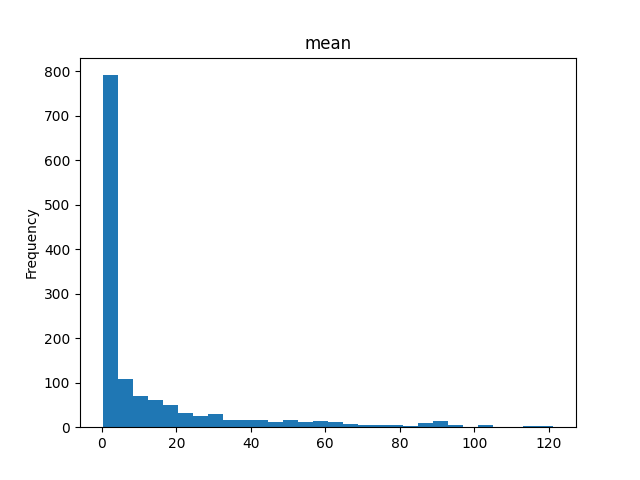

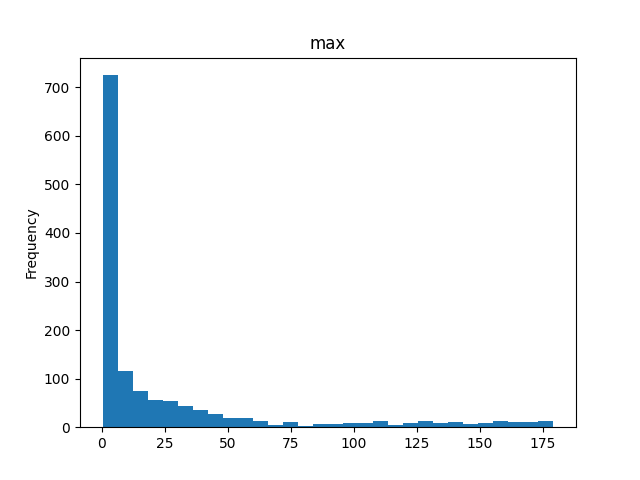

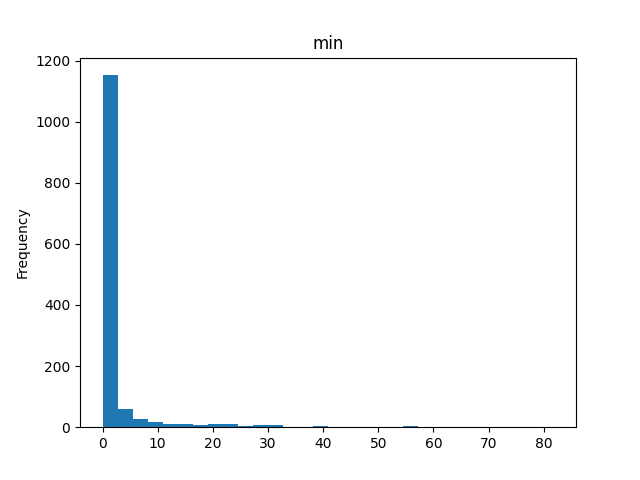

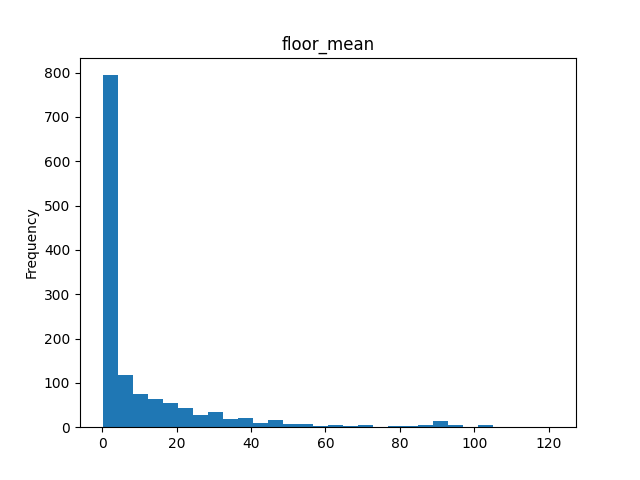

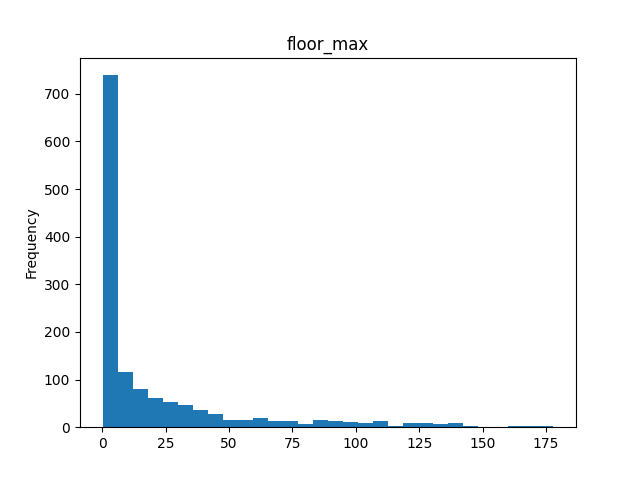

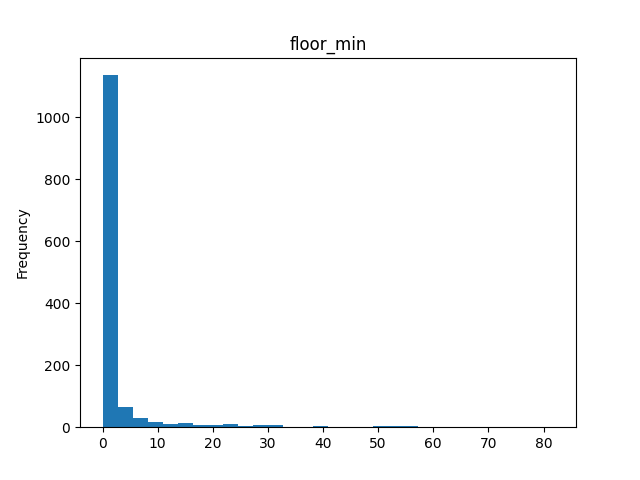

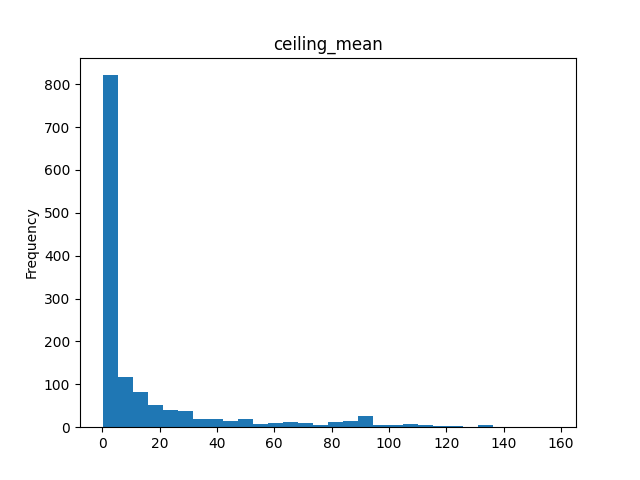

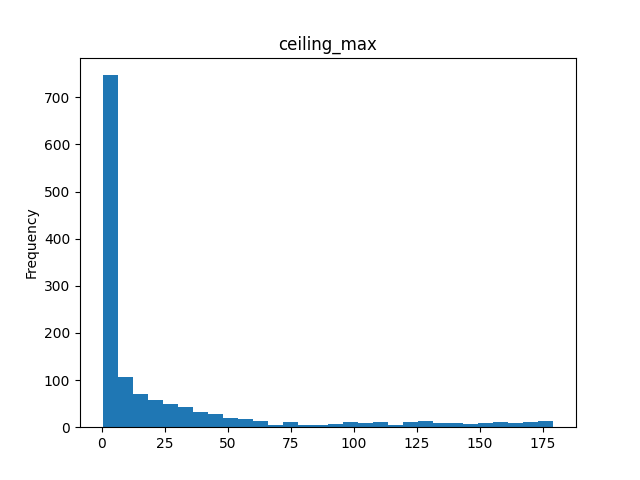

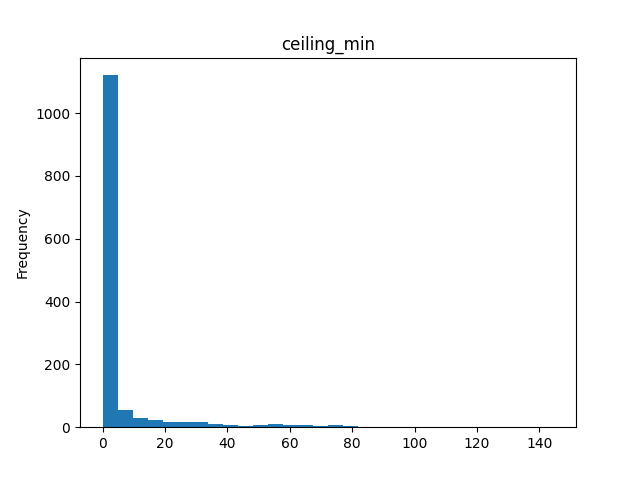

In [18]:
import os
import importlib.util
from IPython.display import Image, display

# Определяем путь к модулю plotter.py
module_name = "plotter"
module_path = os.path.abspath(os.path.join('./src', 'plotter.py'))

# Загрузка модуля
spec = importlib.util.spec_from_file_location(module_name, module_path)
plotter_module = importlib.util.module_from_spec(spec)
spec.loader.exec_module(plotter_module)

# Проверяем наличие файла deviation.json
json_path = './deviation.json'
if not os.path.exists(json_path):
    raise FileNotFoundError(f"{json_path} does not exist.")

# Инициализация Plotter с путем к JSON файлу
plotter = plotter_module.Plotter(json_path)

# Проверка загруженных данных
df = plotter.load_data()
print("DataFrame dtypes:\n", df.dtypes)
print("DataFrame preview:\n", df.head())

# Построение графиков и получение их путей
plot_paths = plotter.draw_plots()

# Отображение графиков
for path in plot_paths:
    display(Image(filename=path))